
## Simulation involving Continuous Random Variables


### Objectives:
The objectives of this exercise are to further expand on our skills of simulating data corresponding to real-world experimental situations. The second is to better understand continuous random variables and their probability density functions.

### Learning Goals:

* Understanding the difference between discrete and continuous random processes
* Ditto for discrete probability distribution and continuous probability density functions
* Simulating continuous random processes
* Computing probabilities from probability density functions

### From Discrete to Continuous

Last time, we explored *discrete* random variables – variables that can only take on a certain finite number of values. This occurs when, for example, we are *counting* things, because counts can only be integers, and nobody actually counts anything to infinity.

#### A discrete example

Sometimes we might measure something and put it into a category based on the measurement. For example, people who fish must measure each fish they catch and determine if it is "too small" or "not too small"; if it's "not too small", then they get to keep it, if it is too small, then they must release it. That's a discrete (binomial) variable. In fact, if we knew the distribution of fish sizes in the water, we could easily predict how often we would get a fish we could keep.

Somebody who's really into fishing might make up more categories, like "minnow", "little", "okay", "big", and "monster". Over time, the distribution of fish might look like this:

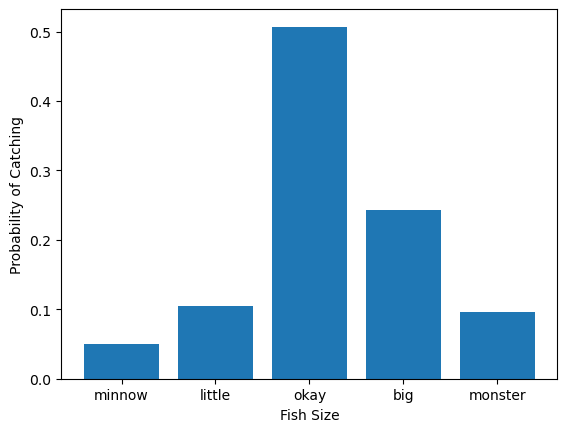

In [20]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

rnd.seed(42) # Set the seed

n = 10000 # Set the number of samples – a lot of fishing!!

size_categories = ['minnow', 'little', 'okay', 'big', 'monster']  # fish categories
size_probabilities = [0.05, 0.1, 0.5, 0.25, 0.1]                  # fish probabilities
counts = np.zeros(len(size_categories))                           # array to hold the counts

sizes = rnd.choice(size_categories, size=n, p=size_probabilities) # go fishing!

for i in size_categories :
    counts[size_categories.index(i)] = np.sum(sizes == i)         # count the fish

fish_probabilities = counts/n                                     # calculate the probabilities


plt.bar(size_categories, fish_probabilities)                      # Plot the histogram
plt.xlabel('Fish Size')
plt.ylabel('Probability of Catching')
plt.show()

This is a ***discrete probability distribution***. What that means is we can look at any one category, like "big", and see that there is about a – what? – 24% chance of catching a "big" fish. If these categories cover all sizes of fish, then the probability of catching *any* of these fish should sum to 1.

In [18]:
print(f"The sum of the probabilities is {np.sum(probs):.2f}")

The sum of the probabilities is 1.00


#### A continuous example

While our fisher person above formed discrete categories for the size of fish, a wildlife biologist or a state game warden would actually *measure* the fish. The length of the fish is ***continuous*** variable. So here's a distribution of fish lengths (in cm) that might be measured by a biologist:

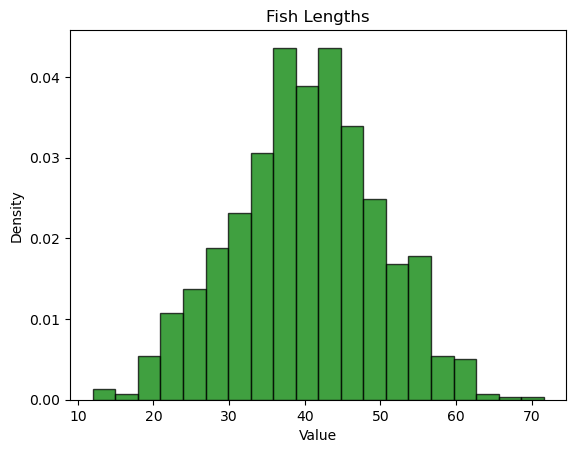

In [22]:
# Simulate a continuous random variable 
n_measurements = 1000 
ave_fish_length = 40
std_fish_length = 10

fish_lengths = rnd.normal(ave_fish_length, std_fish_length, size=n_measurements)

# Plot the results in a histogram
plt.hist(fish_lengths, bins=20, density=True, 
         color='g', alpha=0.75, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Fish Lengths')
plt.show()


In [24]:
fish_densities, fish_bins = np.histogram(fish_lengths, bins=20, density=True)
density_sum = np.sum(fish_densities)
print(f"The sum of the densities is {density_sum:.2f}")

probs_sum = np.sum(fish_densities * np.diff(fish_bins))
print(f"The sum of the probabilities is {probs_sum:.2f}")

The sum of the densities is 0.34
The sum of the probabilities is 1.00


### Computing Probabilities 



#### Computing Probabilities by Counting

#### Computing Probabilities using Density Functions